# Import a TensorFlow model into IBM Watson Machine Learning

Importing a model into Watson Machine Learning means to store a trained model in your Watson Machine Learning repository and then deploy the stored model.  This notebook demonstrates importing a TensorFlow model.

See also: <a href="https://dataplatform.cloud.ibm.com/docs/content/analyze-data/ml-import-tensorflow.html" target="_blank" rel="noopener noreferrer">Importing a TensorFlow model</a>

This notebook runs on Python 3.5.


### Notebook sections

[Step 0: Build, train, and save a model](#step0)

[Step 1: Store the model in your Watson Machine Learning repository](#step1)

[Step 2: Deploy the stored modelin your Watson Machine Learning service](#step2)

## <a id="step0"></a> Step 0: Build, train, and save a model

**About the sample model**

The sample model built here classifies text messages from fictional customers into two categories:
- "social" : The message might just be social and friendly, or the message lacks enough text to perform in-depth analysis
- "problem or question" : The message describes a prob1em or asks a questions

Classifying messages this way is useful for multiple purposes:
- Automating responses (eg. respond to social messages with a generial greeting, prompting the user to type their question or problem if they have one)
- Cleaning out social message for post-hoc analysis


The data used to train the model is the "GoSales.csv" training data in the IBM Watson Studio community: <a href="https://dataplatform.cloud.ibm.com/exchange/public/entry/view/015ddef6a868441188268a123404f744" target="_blank" rel="noopener noreferrer">Customer messages sample data</a>.

### Get and prepare training data

In [ ]:
!pip install wget # Needed to download sample training data

In [4]:
# Download sample training data to the notebook working directory and read it into a Pandas DataFrame
import wget
training_data_url = 'https://dataplatform.cloud.ibm.com/data/exchange-api/v1/entries/015ddef6a868441188268a123404f744/data?accessKey=c8d0403d844a82df9ecd264df02f2b07'
filename = wget.download( training_data_url )
print( filename )

sample-customer-messages.csv


In [5]:
# Read sample data into Pandas DataFrame
import pandas as pd
df = pd.read_csv( filename, names=[ "message", "class_name" ] )
df[6:9]

,message,class_name
6,Greetings :),hi
7,hai how can i do analyze with csv file is ther...,question
8,Having issues setup WML service,problem


In [39]:
# Split the data into training and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test = train_test_split( df, test_size = 0.1 )

In [40]:
# Create a vocaulary containing the words in the training data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit( train["message"] )
vocab_size = len( vectorizer.get_feature_names() )

In [41]:
print( "vocab_size: "+ str( vocab_size) )
print( "\n" + str( vectorizer.get_feature_names()[0:10] ) + " ..." )

vocab_size: 278

['5gb', 'able', 'accepting', 'access', 'account', 'accout', 'acess', 'active', 'add', 'am'] ...


In [42]:
# Convert the messages to vectors
X_train    = vectorizer.transform( train["message"] ).toarray()
X_test     = vectorizer.transform( test["message" ] ).toarray()

In [43]:
test

,message,class_name
77,How do I add collaborators to my project please?,question
78,how do i save my data as a csv file,question
55,Hi I want to know how to make connection to da...,question
32,hi,hi
19,hello I cannot create a Notebook,problem
84,I am not able to register my account need your...,problem
9,Hello,hi
25,hello testing,hi
29,Hey mate hope your well.,hi
53,Hi i need some help when model training they a...,problem


In [44]:
print( X_test[0:1,:] )
print( X_test[1:2,:] )
print( X_test[2:3,:] )

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [45]:
# Convert the labels to binary labels
import scipy
import numpy as np
y_train = np.array( [ [ 1, 0 ] if class_name == "hi" else [ 0, 1 ] for class_name in train[ "class_name" ] ] )
y_test  = np.array( [ [ 1, 0 ] if class_name == "hi" else [ 0, 1 ] for class_name in test[ "class_name" ] ] )
y_test

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

### Build a neural network

In [75]:
import tensorflow as tf

tf.reset_default_graph()

num_inputs         = vocab_size
num_layer1_nodes   = 50
num_output_classes = 2
learning_rate      = 0.01

#Input: X, labels: y
X = tf.placeholder( tf.float32, shape = ( None, num_inputs ) )
y = tf.placeholder( tf.float32, shape = ( None, num_output_classes ) )

# Layer 1
w1 = tf.Variable( tf.truncated_normal( shape=[ num_inputs, num_layer1_nodes ] ) )
b1 = tf.Variable( tf.zeros( shape=[ num_layer1_nodes ] ) )
layer1_output =  tf.nn.relu( tf.matmul( X, w1 ) +  b1 ) 

# Output
w2 = tf.Variable( tf.truncated_normal( shape=[ num_layer1_nodes, num_output_classes ] ) )
b2 = tf.Variable( tf.zeros( shape=[ num_output_classes ] ) )
result = tf.nn.softmax( tf.matmul( layer1_output, w2 ) + b2 )

loss = tf.losses.softmax_cross_entropy( y, result )

optimizer = tf.train.AdamOptimizer( learning_rate ).minimize( loss )

accuracy = tf.reduce_mean( tf.cast( tf.equal( tf.argmax( y, axis = 1 ), tf.argmax( result, axis = 1 ) ), tf.float32 ) )

classify = tf.argmax( result, axis = 1 )

### Train and evaluate model

In [76]:
num_epochs = 40

session = tf.Session()

session.run( tf.global_variables_initializer() )

accuracy_train = []
accuracy_test  = []

for epoch in range( num_epochs ):
    
    session.run( optimizer, feed_dict={ X : X_train, y : y_train } )
    
    accuracy_train.append( session.run( accuracy, feed_dict = { X : X_train, y : y_train } ) )
    accuracy_test.append(  session.run( accuracy, feed_dict = { X : X_test, y  : y_test  } ) )

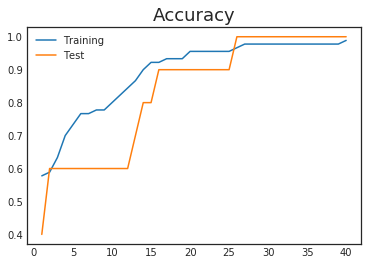

In [77]:
import matplotlib.pyplot as plt
plt.style.use( "seaborn-white" )

plt.title(  "Accuracy", fontsize = 18)

x = range( 1, num_epochs + 1 )
plt.plot( x, accuracy_train, label = "Training" )
plt.plot( x, accuracy_test,  label = "Test" )

legend = plt.legend( loc="upper left" )

In [78]:
test

,message,class_name
77,How do I add collaborators to my project please?,question
78,how do i save my data as a csv file,question
55,Hi I want to know how to make connection to da...,question
32,hi,hi
19,hello I cannot create a Notebook,problem
84,I am not able to register my account need your...,problem
9,Hello,hi
25,hello testing,hi
29,Hey mate hope your well.,hi
53,Hi i need some help when model training they a...,problem


In [79]:
test_results = session.run( classify, feed_dict = { X : X_test } )
print( test_results )

[1 1 1 0 1 1 0 0 0 1]


### Save the model
You can import your TensorFlow model into Watson Machine Learning in two formats:
- Model saved in a directory using <a href="https://www.tensorflow.org/guide/saved_model#save_and_restore_models" target="_blank" rel="noopener noreferrer">`saved_model`</a>
- Model saved in a tar.gz file

In this section of the notebook, the model is saved in a dictionary, and the ditionary is saved in a tar.gz file to demonstrate both options.

In [ ]:
classification_inputs         = tf.saved_model.utils.build_tensor_info( X )
classification_output_classes = tf.saved_model.utils.build_tensor_info( classify )

classification_signature = ( tf.saved_model.signature_def_utils.build_signature_def (
    inputs  = { tf.saved_model.signature_constants.CLASSIFY_INPUTS         : classification_inputs },
    outputs = { tf.saved_model.signature_constants.CLASSIFY_OUTPUT_CLASSES : classification_output_classes },
    method_name=tf.saved_model.signature_constants.CLASSIFY_METHOD_NAME ) )

#print( classification_signature )

In [82]:
# Save the model in a directory
builder = tf.saved_model.builder.SavedModelBuilder( "message-classification-model-dir" )

builder.add_meta_graph_and_variables(
      session, [ tf.saved_model.tag_constants.SERVING ],
      signature_def_map={ "classify_message" : classification_signature, },
      main_op=tf.tables_initializer() )

builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b'message-classification-model-dir/saved_model.pb'


b'message-classification-model-dir/saved_model.pb'

In [101]:
!ls -l message-classification-model-dir
!ls -l message-classification-model-dir/variables

total 68
-rw-r----- 1 dsxuser dsxuser 64914 Mar 10 00:04 saved_model.pb
drwxr-x--- 2 dsxuser dsxuser  4096 Mar 10 00:04 variables
total 172
-rw-r----- 1 dsxuser dsxuser 168632 Mar 10 00:04 variables.data-00000-of-00001
-rw-r----- 1 dsxuser dsxuser    496 Mar 10 00:04 variables.index


In [123]:
# Save the model in a tar.gz file
!tar -zcvf message-classification-model.tar.gz -C message-classification-model-dir .

./
./saved_model.pb
./variables/
./variables/variables.index
./variables/variables.data-00000-of-00001


In [124]:
!ls -l

total 124
drwxr-x--- 3 dsxuser dsxuser   4096 Mar 10 00:04 message-classification-model-dir
-rw-r----- 1 dsxuser dsxuser 112716 Mar 10 00:29 message-classification-model.tar.gz
-rw-r----- 1 dsxuser dsxuser   5781 Mar  9 23:48 sample-customer-messages.csv


## <a id="step1"></a> Step 1: Store the model in your Watson Machine Learning repository

This section of the notebook demonstrates calling the <a href="https://wml-api-pyclient.mybluemix.net/index.html?highlight=store_model#client.Repository.store_model" target="_blank" rel="noopener noreferrer">store_model</a> function

Paste your Watson Machine Learning credentials in the following cell.

See: <a href="https://dataplatform.cloud.ibm.com/docs/content/analyze-data/ml-get-wml-credentials.html" target="_blank" rel="noopener noreferrer">Looking up credentials</a>

In [ ]:
# Create a Watson Machine Learning client instance
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials = {
    "instance_id" : "",
    "password"    : "",
    "url"         : "",
    "username"    : ""
}
client = WatsonMachineLearningAPIClient( wml_credentials )

In [86]:
# Format 1: Model saved in a directory
#
# Parameters:
# 1. The directory where the model was saved
# 2. Metadata, including a name you choose for the stored model, as well as information about the framework
#
metadata = {
    client.repository.ModelMetaNames.NAME: "TensorFlow model (directory)",
    client.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: "1.5"
}
model_details_dir = client.repository.store_model( model="message-classification-model-dir", meta_props=metadata )

In [125]:
# Format 2: Model saved in a directory, and that directory saved in a tar.gz file
#
# Parameters:
# 1. The tar.gz file containing the directory where the model was saved
# 2. Metadata, including a name you choose for the stored model, as well as information about the framework
#
metadata = {
    client.repository.ModelMetaNames.NAME: "TensorFlow model (tar.gz)",
    client.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: "1.5"
}
model_details_targz = client.repository.store_model( model="message-classification-model.tar.gz", meta_props=metadata )

## <a id="step2"></a> Step 2: Deploy the stored the model in your Watson Machine Learning service

This section of the notebook demonstrates calling the <a href="https://wml-api-pyclient.mybluemix.net/index.html?highlight=deploy#client.Deployments.create" target="_blank" rel="noopener noreferrer">deployments.create</a> function

In [129]:
# Deploy the stored model as an online web service deployment
model_id_dir = model_details_dir["metadata"]["guid"]
deployment_details_dir = client.deployments.create( artifact_uid=model_id_dir, name="TensorFlow deployment (directory)" )



#######################################################################################

Synchronous deployment creation for uid: '27a78d47-ac16-4b6b-a018-128fdbe32fa4' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='af2e719d-baf8-4685-90ed-a5379c7f641b'
------------------------------------------------------------------------------------------------




In [130]:
# Test the deployment
model_endpoint_url_dir = client.deployments.get_scoring_url( deployment_details_dir )
payload = { "values" : X_test.tolist() }
client.deployments.score( model_endpoint_url_dir, payload )

{'values': [1, 1, 1, 0, 1, 1, 0, 0, 0, 1]}

## Summary
In this notebook, you imported a TensorFlow model into Watson Machine Learning using the Watson Machine Learning Python client.

### <a id="authors"></a>Authors

**Sarah Packowski** is a member of the IBM Watson Studio Content Design team in Canada.


<hr>
Copyright &copy; IBM Corp. 2019. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>